## Direct debit requires that a list of banking services be provided to employees base on:
* Thier place of employment
* Place of residence

This is an effort to automate the delivery of thjat information. For each employee, this script should:
1. Provide a list of banking services located within 1 (radial?) mile of their home address
2. Provide a map with the location of banking services coresponding to the list above (ennumerated?)
3. Provide a list of banking services located within 1 (radial?) mile of their work address
4. Provide a map with the location of banking services coresponding to the list above (ennumerated?)

For the purposes of this proof of concept, banking services will be defined to include:
* Bank branches
* ATM machines

Assumptions: 
1. Data will be provided in csv format
    * to include:
        * Name (First & Last)
        * Home Address
        * Office location & Address
        

## Imports


In [48]:
#Imports first

import os
import matplotlib.pyplot as plt
import requests
import pandas as pd
from googlemaps import googlemaps
import json
from PIL import Image, ImageOps
from io import BytesIO

## Import data

## Convert home address into lat-long

In [3]:
file_loc = 'C:/Users/Jonathan/DirectDebit/data/'
file_path = file_loc + 'direct_debit_clean.csv'
ouput_loc = 'C:/Users/Jonathan/DirectDebit/data/'

df_clean = pd.read_csv(file_path)

In [4]:
df_clean.head()

,Unnamed: 0,First_name,Last_name,Email,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH,OFFICE_NUMBER,OFFICE_STREET,OFFICE_CITY,OFFICE_REGION,OFFICE_POSTCODE
0,0,Brandon,Newman,brandon.newman@directdebitsample.com,-78.963960,42.441394,11337,Dewey Road,NaN,Perrysburg,Cattaraugus,NY,NaN,CATT036895,e3b613190ea934d2,366,West Main Street,Concord,NY,NaN
1,1,Dominic,Pullman,dominic.pullman@directdebitsample.com,-78.252336,42.386628,8854,County Road 7E,NaN,Rushford,Allegany,NY,NaN,ALLE005555,88146015a1da33e6,7327,Groveland Station Road,Groveland,NY,NaN
2,2,Oliver,Murray,oliver.murray@directdebitsample.com,-77.831374,42.559236,3467,Route 436,NaN,Ossian,Livingston,NY,NaN,LIVI008863,b2d5265bd565c8e1,4,Ball Street,Barton,NY,NaN
3,3,Rebecca,Tucker,rebecca.tucker@directdebitsample.com,-76.360721,42.367440,103,Grove School Road,NaN,Caroline,Tompkins,NY,NaN,TOMP012017,35107fb4aea327f6,28,Jackson Creek Road,Horseheads,NY,NaN
4,4,Boris,Metcalfe,boris.metcalfe@directdebitsample.com,-75.847634,42.929323,8,Fenner Street,Apartment 4,Cazenovia,Madison,NY,NaN,MADI033910,5a830dd90d716201,1718,Seneca Road,Lodi,NY,NaN


In [5]:
# Loop through all of the addresses
# for row in df_clean.iterrows():
#     print(row)
df_clean.iloc[0]

Unnamed: 0                                            0
First_name                                      Brandon
Last_name                                        Newman
Email              brandon.newman@directdebitsample.com
LON                                             -78.964
LAT                                             42.4414
NUMBER                                            11337
STREET                                       Dewey Road
UNIT                                                NaN
CITY                                         Perrysburg
DISTRICT                                    Cattaraugus
REGION                                               NY
POSTCODE                                            NaN
ID                                           CATT036895
HASH                                   e3b613190ea934d2
OFFICE_NUMBER                                       366
OFFICE_STREET                          West Main Street
OFFICE_CITY                                     

In [6]:
df_clean.iloc[0]['NUMBER'] + df_clean.iloc[0]['STREET'] + df_clean.iloc[0]['CITY'] + df_clean.iloc[0]['REGION'].format()

'11337Dewey RoadPerrysburgNY'

In [54]:
address = ' '.join([df_clean.iloc[0]['NUMBER'],df_clean.iloc[0]['STREET'], df_clean.iloc[0]['CITY'],df_clean.iloc[0]['REGION']])
address

'11337 Dewey Road Perrysburg NY'

## Convert office address into lat-long

## Search for banking services near home

## Search for banking services near office

####  Get API key - stored in file name: gm-config.config

In [8]:
apikey_path = "C:/Users/Jonathan/Google Drive/"


In [9]:
with open(apikey_path + 'gm_config.config', 'r') as f:
    api_key = f.readline()
    api_key = api_key.strip()


In [10]:
place_type = 'atm'
near_radius = 1 # in miles
keywords = 'bank'
search_location = ''
KEY = api_key

In [11]:
from googlemaps import googlemaps
gmaps = googlemaps.Client(key=api_key)
address = 'Constitution Ave NW & 10th St NW, Washington, DC'
lat= gmaps.geocode(address)[0]
lat

{'address_components': [{'long_name': 'Constitution Ave NW & 10th St NW',
   'short_name': 'Constitution Ave NW & 10th St NW',
   'types': ['bus_station',
    'establishment',
    'point_of_interest',
    'transit_station']},
  {'long_name': 'Northwest Washington',
   'short_name': 'Northwest Washington',
   'types': ['neighborhood', 'political']},
  {'long_name': 'Washington',
   'short_name': 'Washington',
   'types': ['locality', 'political']},
  {'long_name': 'District of Columbia',
   'short_name': 'DC',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': 'United States',
   'short_name': 'US',
   'types': ['country', 'political']},
  {'long_name': '20004', 'short_name': '20004', 'types': ['postal_code']}],
 'formatted_address': 'Constitution Ave NW & 10th St NW, Washington, DC 20004, USA',
 'geometry': {'location': {'lat': 38.892207, 'lng': -77.02646469999999},
  'location_type': 'APPROXIMATE',
  'viewport': {'northeast': {'lat': 38.8935559802915,
    'lng'

In [12]:
lat_long = dict([])
lat['geometry']['location']
lat_long = {'lat': lat['geometry']['location']['lat'], 'lon':lat['geometry']['location']['lng']}


In [13]:
lat_long

{'lat': 38.892207, 'lon': -77.02646469999999}

In [31]:
banking_places = gmaps.places("banking services", location=(38.8921037,-77.0259612), type='atm', radius=1600)

In [32]:
banking_places

{'html_attributions': [],
 'results': [{'formatted_address': "965 L'Enfant Plaza SW, Washington, DC 20024, United States",
   'geometry': {'location': {'lat': 38.8844772, 'lng': -77.0250714},
    'viewport': {'northeast': {'lat': 38.8855434802915,
      'lng': -77.0241194197085},
     'southwest': {'lat': 38.8828455197085, 'lng': -77.0268173802915}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/bank_dollar-71.png',
   'id': 'da379734a9f4a51edd0ed93d4f415da648d40e3f',
   'name': 'SunTrust Bank',
   'opening_hours': {'exceptional_date': [],
    'open_now': False,
    'weekday_text': []},
   'photos': [{'height': 600,
     'html_attributions': ['<a href="https://maps.google.com/maps/contrib/114923049409822236256/photos">SunTrust Bank</a>'],
     'photo_reference': 'CoQBdwAAAB5rUAzD0OsaEQecU1u6rscNNe-azlwVuWY7wkIc84umovfczyyv1tn6UArbli6yT7YIe8N61RwKZxtAy90B3qx098l5tUdYKeg4EoMjxImfFSpnDVwrxHo4nPBjueeKL6lUWSz4KUtfBOnv-8QzS_qt3mNxsgiejfO5NQuzqQJzEhCKg341bDAJgHFlYo2l8frWGhT4c

In [33]:
banking_places.keys()

dict_keys(['html_attributions', 'results', 'status'])

In [34]:
print(json.dumps(banking_places['results'], indent=4))

[
    {
        "formatted_address": "965 L'Enfant Plaza SW, Washington, DC 20024, United States",
        "geometry": {
            "location": {
                "lat": 38.8844772,
                "lng": -77.0250714
            },
            "viewport": {
                "northeast": {
                    "lat": 38.8855434802915,
                    "lng": -77.0241194197085
                },
                "southwest": {
                    "lat": 38.8828455197085,
                    "lng": -77.0268173802915
                }
            }
        },
        "icon": "https://maps.gstatic.com/mapfiles/place_api/icons/bank_dollar-71.png",
        "id": "da379734a9f4a51edd0ed93d4f415da648d40e3f",
        "name": "SunTrust Bank",
        "opening_hours": {
            "exceptional_date": [],
            "open_now": false,
            "weekday_text": []
        },
        "photos": [
            {
                "height": 600,
                "html_attributions": [
                   

In [35]:
markers =[]
for bank in banking_places['results']:
    markers.append(bank['formatted_address'])
    print([bank['name'], bank['formatted_address']])

['SunTrust Bank', "965 L'Enfant Plaza SW, Washington, DC 20024, United States"]
['M&T Bank', '555 12th St NW, Washington, DC 20004, United States']
['SunTrust Bank', '1445 New York Ave NW, Washington, DC 20005, United States']
['SunTrust Bank', '2 Massachusetts Ave NW, Washington, DC 20001, United States']
['SunTrust Bank', '1100 G St NW, Washington, DC 20005, United States']
['SunTrust Bank', '1275 K St NW, Washington, DC 20005, United States']
['M&T Bank', '1680 K St NW, Washington, DC 20006, United States']
['M&T Bank', '1899 L St NW, Washington, DC 20036, United States']
['Hew Federal Credit Union', '888 First St NE, Washington, DC 20002, United States']
['SIGNAL FINANCIAL FCU Shared Branch Express & Smart ATM', '1201 New York Ave NW, Washington, DC 20005, United States']
['UNFCU', '1775 Pennsylvania Ave NW, Washington, DC 20006, United States']
['Hew Federal', '200 Independence Ave SW, Washington, DC 20201, United States']
['Justice Federal Credit Union', '500 12th St SW, Washingt

In [36]:
##Google maps static API can only place 10 total markers

s = "|";
markers = s.join(markers[0:9])
markers

"965 L'Enfant Plaza SW, Washington, DC 20024, United States|555 12th St NW, Washington, DC 20004, United States|1445 New York Ave NW, Washington, DC 20005, United States|2 Massachusetts Ave NW, Washington, DC 20001, United States|1100 G St NW, Washington, DC 20005, United States|1275 K St NW, Washington, DC 20005, United States|1680 K St NW, Washington, DC 20006, United States|1899 L St NW, Washington, DC 20036, United States|888 First St NE, Washington, DC 20002, United States"

In [173]:
import importlib.util
spec = importlib.util.spec_from_file_location("create_map_markers", 
                                              "C:/Users/Jonathan/DirectDebit/src/create_map_markers.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

m=foo.Map()

In [175]:
m.add_point(38.8969, -77.02)

TypeError: add_point() takes 2 positional arguments but 3 were given

In [240]:
payload = {#'zoom': '13',
           'size': '400x400', 
           #'scale': '1',
           'maptype': 'roadmap',
           'markers': '435 8th St NW, Washington, DC 20004, United States|555 12th St NW, Washington, DC 20004, United States ',}

In [58]:
#attempt at all the markers
payload = {#'zoom': '13',
           'size': '100x100', 
           #'scale': '1',
           'maptype': 'roadmap',
           'markers': markers,
    'key':api_key}


In [59]:

r = requests.get('https://maps.googleapis.com/maps/api/staticmap?', params=payload)



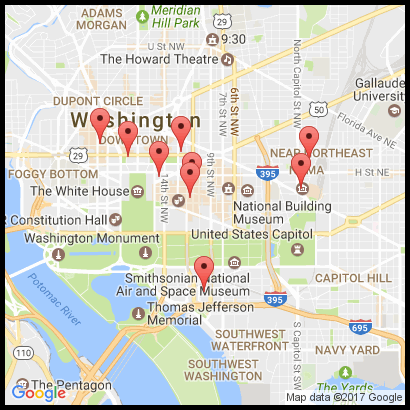

In [64]:
i = Image.open(BytesIO(r.content))
i = i.convert("RGBA")
new_img = ImageOps.expand(converted_image,border=5,fill='black')
new_img.save('C:/Users/Jonathan/DirectDebit/figures/test_image.png')

new_img

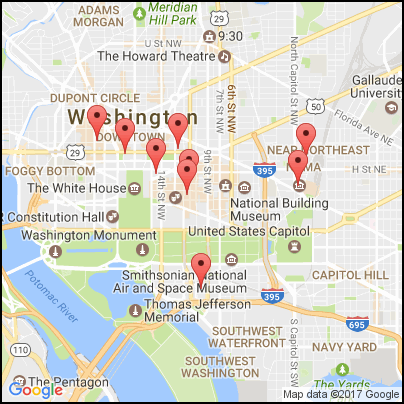

TypeError: function takes exactly 1 argument (3 given)

In [ ]:
def create_map_markers(:
    s = "|"
    markers = s.join(markers[0:9])
    markers

In [53]:
new_img = ImageOps.expand(converted_image,border=2,fill='black')

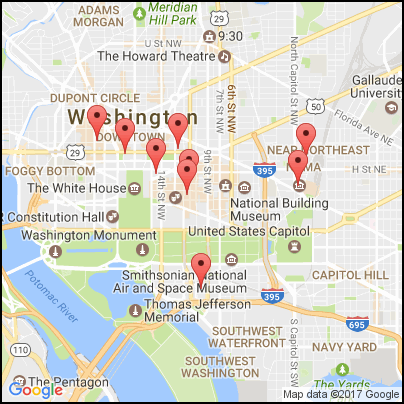

In [54]:
new_img

In [ ]:
print